<a href="https://colab.research.google.com/drive/15lilCSeUfnYBOeVPftARFxAoyBD4ffKE?usp=sharing"
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Augmentation Horses-vs-Humans**

**Model's Structure**

While learning or programming a deep neural network, the most important thing is to arrange data in the form of matrix. Weights and biases (commonly referred to as W and b) are the learnable parameters of a machine learning model. ... When the inputs are transmitted between neurons, the weights are applied to the inputs along with the bias

- X (input) -> Weighths(Signal strengths between neurons) ->
- bias(input into the next layer, value = 1 -> Y (output)
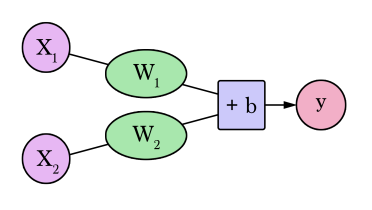

### **Training neural network to classify horses and humans with Image Augmentation**
Write an algorithm to classify whether images contain either a human or a horse. You'll follow these steps:

    1) Explore the  Data of Horses and Humans and build and train a Deep Neural Network (DNN) to recognize the difference between the two.
    Note the input shape is the desired size of the image 300x300 with 3 bytes color

    2) Create five convolutional neural network(filter/reduce image) layers that trains the accuracy on these images. 
      Convd2D layers for (16), (32), (64),(64),(64) with a 3x3 filter and epochs = 20. Pooling(compress/reduce)2x2 layer. 
      
    3) Evaluate the Training and Validation accuracy: batch_size = 10. Note Loss (output probability) how good the predictions are. 
      Optimizer,(optimal values) generates new predictions

    4) Plot Training/Validation Accuracy and loss for the model.
       Retrieve training and validation accuracy for epoch
       Plot training and validation accuracy for epoch
       Plot training and validation loss for epoch

    5) Update to do image augmentation
      train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'

The **training set data** tells the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc.

The **validation data set** is images of horses and human that the neural network will not see as part of the training, so you can test how well or how badly it does in evaluating if an image contains a horse or a human.



### **Convolutions Neural Networks**: 
Concept is that they narrow down the content of the image (**Filter images/reduce size=accuracy** ) to focus on specific, distinct, details.
- **Convolution**: Isolate (**filter**) image features. Conv2D 3x3 filter = output 26x26 image
- **Pooling**: Reduce(**compress**) image meatures. MaxPooling2D 26x26 image with 2x2 filter = output 13x13
- **Loss** (*output probability*) how good the predictions are. **Optimizer**,(*optimal values*) generates new predictions
- **'rmsprop(lr=0.001) lr(learning rate)'**, automates learning-rate during training. **'adam'** (finding optimal values)
- **loss** = **'categorical_crossentropy'** ( ouput probability) targets **one-hot-coded**. 
- **loss**= **'sparse_categorical_crossentropy'** targets **integer** and **binary_crossentropy** targets two images
- **Flatten**: turns square image into a 1 dimensional set
- **Dropouts**: The idea behind Dropouts is that layers in a neural network can sometimes end up having similar weights and impact each other leading to overfitting. 
- They remove a random number of neurons in your neural network preventing overfitting.

### **Import and load data**

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

# create folder locations
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

--2020-11-25 14:53:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  54.5MB/s    in 2.6s    

2020-11-25 14:53:39 (54.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-11-25 14:53:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11


### **Proprocessing Data for Training and Validation**
- Directory with our training horse pictures/- Directory with our training human pictures
- Directory with our validation horse pictures/- Directory with our validation human pictures
- The total number of horse and human images(training) in the directories
- The total number of horses and humans images(validation) in the directories:

In [2]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [3]:
#The total number of horse and human images(training) in the directories
print('total training horse pics:', len(os.listdir(train_horse_dir ) ))
print('total training human pics :', len(os.listdir(train_human_dir ) ))

#The total number of horse and human images(validation) in the directories
print('total validation horse pics :', len(os.listdir(validation_horse_dir ) ))
print('total validation human pics :', len(os.listdir(validation_human_dir ) ))

total training horse pics: 500
total training human pics : 527
total validation horse pics : 128
total validation human pics : 128


### **Visualization of horse and human**
Using matplotlib let's take a look at a few pictures to get a better sense of what they look like:
- Import libraries
- Create function(load_image) to load images from training horse folder

In [4]:
#importing all the necessary libraries

import numpy as np                     
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2 as cv
import random

In [5]:
#load a single image from the training horse folder

def load_image(dir):
    for img in os.listdir(train_horse_dir):
        print('Image name =',img)
        image = cv.imread(os.path.join(train_horse_dir, img))
        break
        
    return image

**Single Horse Image**
- Title "Horse Image'
- Dimensions in height x width
- Maximum pixel value/-Minimum pixel value
- Mean pixel value/- standard deviation of image

Image name = horse01-6.png
The dimensions are: (300, 300, 3)
The maximum pixel value is: 255.00
The minimum pixel value is: 17.00
The mean value is: 174.79
The standard deviation is: 50.15


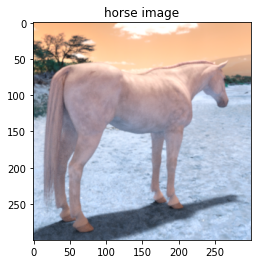

In [6]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
image = load_image(train_horse_dir)
plt.imshow(image, cmap='gray')
plt.title('horse image')
print(f"The dimensions are: {image.shape}")
print(f"The maximum pixel value is: {image.max():.2f}")
print(f"The minimum pixel value is: {image.min():.2f}")
print(f"The mean value is: {image.mean():.2f}")
print(f"The standard deviation is: {image.std():.2f}")


Create function(load_image) to load images from training human folder

**Single Human Image**
- plt color bar and title "Human Image'
- Dimensions in height x width
- Maximum pixel value/-Minimum pixel value
- Mean pixel value/- standard deviation of image

In [7]:
#load a single image from the training human folder

def load_image(dir):
    for img in os.listdir(train_human_dir):
        print('Image name =',img)
        image = cv.imread(os.path.join(train_human_dir, img))
        break
        
    return image

Image name = human03-07.png
The dimensions are: (300, 300, 3)
The maximum value is: 255.00
The minimun value is: 1.00
The standard deviation is:75.30


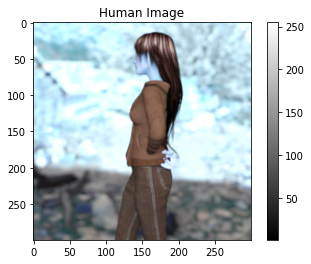

In [8]:
#Investigate a single image
image = load_image(train_human_dir)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Human Image')
print(f"The dimensions are: {image.shape}")
print(f"The maximum value is: {image.max():.2f}")
print(f"The minimun value is: {image.min():.2f}")
print(f"The standard deviation is:{image.std():.2f}")


**Load nine random horse images from train_horse_dir directory**

**Load nine random human images from train_human_dir directory**

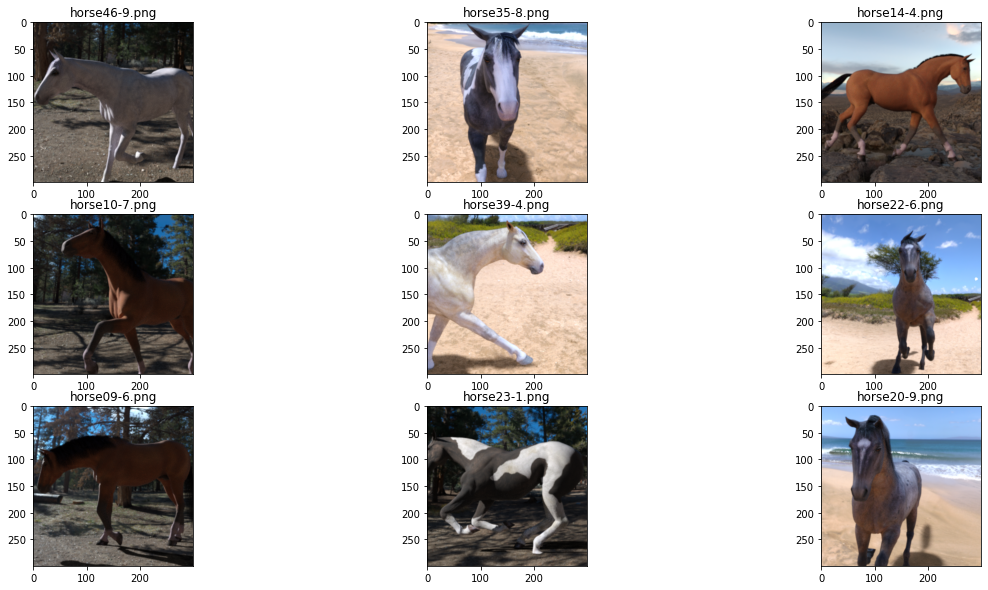

In [9]:
# load nine random horse images
plt.figure(figsize=(20,10))
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# iterate througe nine images
for i in range(9):
    file = random.choice(os.listdir(train_horse_dir))
    image_path= os.path.join(train_horse_dir, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(3, 3, i + 1)
    ax.title.set_text(file)
    plt.imshow(img)

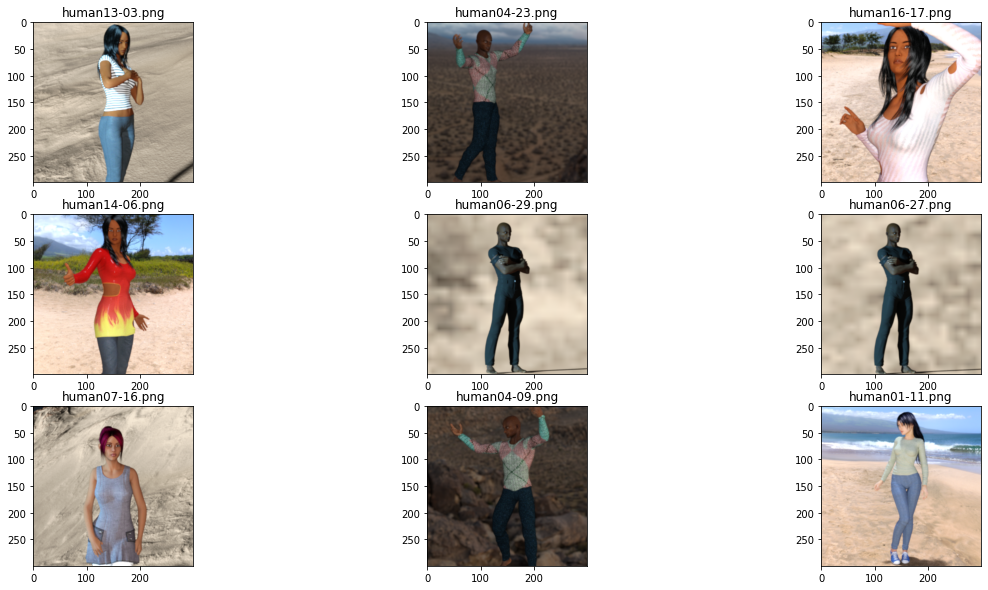

In [10]:
# load nine random human image
import matplotlib.image as mpimg

plt.figure(figsize=(20,10))
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# iterate thorough 9 images
for i in range(9):
    file = random.choice(os.listdir(train_human_dir))
    image_path= os.path.join(train_human_dir,file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(3, 3, i + 1)
    ax.title.set_text(file)
    plt.imshow(img)

### **Build (layers)compile neural network, activation 'relu'**
    - Input shape is the desired size of the image 300x300 with 3 bytes color
    - Five convolutional neural network(filter/reduce image) layers         
    - Convd2D layers for (16), (32), (64),(64),(64)neurons with a 3x3filter 
    - MaxPooling2d with 2x2filter
    - Add a flatten layer, and Dense(hidden layer), 512 neurons
    - 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') 
      and 1 for the other ('humans') with activation 'sigmoid
    - epochs = 20 iterations, compile with RMSprop(learning rate) and binary crossentrophy. 

In [16]:
# Build model layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# print model summary
model.summary()

# compile model
model.compile(optimizer=RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

    Sequential defines a SEQUENCE of layers in the neural network.
    Sigmoid network predict values between 0 and 1 probability.
    Softmax takes a set of values, and effectively picks the biggest one
    Relu > 0

### **Understanding ImageGenerators**
One feature of the image generator is that you can point it at a directory and then the sub-directories of that will automatically generate labels for you.In short: The training set is the data that is used to tell the neural network model that 'this is what a cat looks like' and 'this is what a dog looks like'.

    - Rotation_range(40): is a value in degrees (0–180), a range within which to randomly rotate pictures.
    - Width_shift(0.2): and height_shift are ranges within which randomly translate pictures vertically or horizontally.
    - Shear_range(0.2): is for randomly applying shearing transformations.
    - Zoom_range(0.2): is for randomly zooming inside pictures.
    - Horizontal_flip(true0: is for randomly flipping half of the images horizontally. 
    - Fill_mode(nearest): filling in newly created pixels, which can appear after a rotation or a width/height shift



### **Preprocess image with ImageDataGenerator and Image Augmentation**
In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).
- Add our data-augmentation parameters to ImageDataGenerator
- Prepare (rescale) data: train_datagen
- Validate_datagen should not be augmentated
- Flow training images from directory , target size(300,300) batches of 10, class mode 'binary'using train_generator
- Flow validation images from directory , target size(300) batches of 10, class mode 'binary'using train_generator

In [17]:
# prepare(rescale) data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1/255)

#Flow training images from dir , target size(300) batches of 10, class mode 'binary'using train_generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

#Flow validation images from dir , target size(300) batches of 10, class mode 'binary'using train_generator
# validate generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### **Train (fit generator) neural network with history**
    - steps per epoch(batch size and steps)=8. epochs = 10
    - verbose = 1: verbose=0 will shows nothing (silent) verbose=1 show you progress bar
    - validation data and validation steps=8

In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  # batch size * steps 
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8) #batch size * steps 

Epoch 1/10
8/8 [==============================] - 2s 303ms/step - loss: 0.9270 - accuracy: 0.6000 - val_loss: 0.6772 - val_accuracy: 0.5875
Epoch 2/10
8/8 [==============================] - 2s 285ms/step - loss: 0.6968 - accuracy: 0.5125 - val_loss: 0.6985 - val_accuracy: 0.4750
Epoch 3/10
8/8 [==============================] - 2s 277ms/step - loss: 0.7029 - accuracy: 0.4416 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 2s 286ms/step - loss: 0.6871 - accuracy: 0.5000 - val_loss: 0.7132 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 2s 285ms/step - loss: 0.7190 - accuracy: 0.6250 - val_loss: 0.6868 - val_accuracy: 0.4875
Epoch 6/10
8/8 [==============================] - 2s 284ms/step - loss: 1.0053 - accuracy: 0.6500 - val_loss: 0.7838 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 2s 287ms/step - loss: 0.6604 - accuracy: 0.6125 - val_loss: 0.6658 - val_accuracy: 0.5625
Epoch 8/10
8/8 [====

### **Plot Training/Validation Accuracy and Loss for the Model**
- Retrieve training and validation accuracy for epoch
- Plot training and validation accuracy for epoch
- Plot training and validation loss for epoch

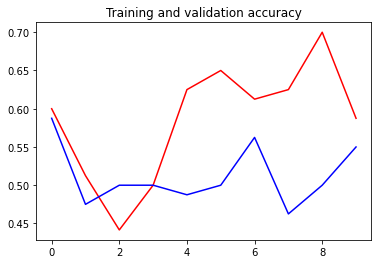

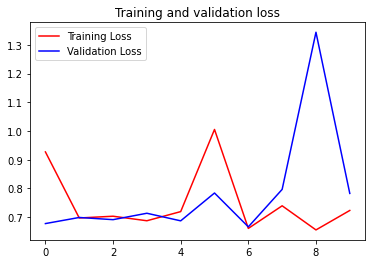

In [19]:
# acc, val_acc, loss & val_loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# number of epochs in range
epochs = range(len(acc))

# plt acc and val_acc with labels Training accuracy and Validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

# plt loss and val_loss with labels Training loss and Validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The **Loss and Accuracy** are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. **Loss Accuracy** is the portion of correct guesses or how well the network training is doing. The **Validation** accuracy is the measurement with the data that has not been used in training

## **Summary**
The results of the graph and the training data shows **training acc = 58%** and **validation acc = 55%** which translate no overfitting, model results were great.

The results of the graph and the training data shows **training loss = 72%** and **validation loss = 78%** which translate no overfitting, model results were great
